In [1]:
import os

os.chdir("../..")

In [80]:
import pandas as pd


setting_renamer = {
    "Setting1_sub": "5-shot",
    "Setting2": "+ Len ctrl",
    "Setting3": "+ Sim ctrl",
    "Setting5: Exemplars+Summary": "+ Snippet"
}


def load_follow_up_results(df):
    df = df.copy()[~df["Setting"].isin(["Setting1", "Setting4", 
                                        "Setting4_sub", "Setting5: SummaryOnly"])]
    df = df.copy()[~df["Setting"].str.contains("Setting6")].reset_index(drop=True)
    df.Setting = df.Setting.map(setting_renamer)
    
    return df


av_df = pd.read_csv("results/AV_generated_results.csv")
av_df = load_follow_up_results(av_df)
av_df

,Setting,Dataset,LLM_Model,AV_Model,Top_1
0,+ Snippet,enron,gemini-2.0-flash,longformer-base-4096,92.33
1,+ Snippet,enron,gemini-2.0-flash,ModernBERT-base,92.33
2,+ Snippet,enron,llama-4-maverick-17b-128e-instruct,longformer-base-4096,91.67
3,+ Snippet,enron,llama-4-maverick-17b-128e-instruct,ModernBERT-base,85.33
4,+ Snippet,enron,gpt-4o-2024-08-06,longformer-base-4096,89.67
...,...,...,...,...,...
91,5-shot,CCAT50,gemini-2.0-flash,ModernBERT-base,99.00
92,5-shot,CCAT50,llama-4-maverick-17b-128e-instruct,longformer-base-4096,93.00
93,5-shot,CCAT50,llama-4-maverick-17b-128e-instruct,ModernBERT-base,96.00
94,5-shot,CCAT50,gpt-4o-2024-08-06,longformer-base-4096,94.67


In [81]:
aa_df = pd.read_csv("results/AA_generated_results.csv")
aa_df = load_follow_up_results(aa_df)
aa_df

,Setting,Dataset,LLM_Model,AA_Model,Top_1,Top_3,Top_5,Top_10
0,+ Snippet,enron,gemini-2.0-flash,longformer-base-4096,58.00,72.33,79.00,83.67
1,+ Snippet,enron,gemini-2.0-flash,ModernBERT-base,39.67,50.33,57.33,64.33
2,+ Snippet,enron,llama-4-maverick-17b-128e-instruct,longformer-base-4096,37.33,54.33,65.33,77.00
3,+ Snippet,enron,llama-4-maverick-17b-128e-instruct,ModernBERT-base,29.00,40.00,46.00,55.00
4,+ Snippet,enron,gpt-4o-2024-08-06,longformer-base-4096,44.00,60.00,67.67,76.00
...,...,...,...,...,...,...,...,...
91,5-shot,CCAT50,gemini-2.0-flash,ModernBERT-base,53.00,82.00,90.67,95.67
92,5-shot,CCAT50,llama-4-maverick-17b-128e-instruct,longformer-base-4096,65.00,89.00,94.67,98.00
93,5-shot,CCAT50,llama-4-maverick-17b-128e-instruct,ModernBERT-base,42.67,68.67,79.00,89.33
94,5-shot,CCAT50,gpt-4o-2024-08-06,longformer-base-4096,66.67,87.67,95.00,98.67


In [82]:
out = []
cols = ["Dataset", "Setting", "AV", "AA (top-1)", 
        "AA (top-3)", "AA (top-5)"]

datasets = ['CCAT50', 'enron', 'reddit', 'blog']
settings = ['5-shot', '+ Len ctrl', '+ Sim ctrl', '+ Snippet']


for dataset in datasets:
    for i, setting in enumerate(settings):
        av_sub = av_df[(av_df["Dataset"] == dataset) & (av_df["Setting"] == setting)]
        aa_sub = aa_df[(aa_df["Dataset"] == dataset) & (aa_df["Setting"] == setting)]
        
        if i == 0:
            dataset_name = dataset if dataset == "CCAT50" else dataset.capitalize()
        else:
            dataset_name = " "

        out.append(
                {
                        "Dataset": dataset_name,
                        "Setting": setting,
                        "AV": round(av_sub["Top_1"].mean(), 2),
                        "AA (top-1)": round(aa_sub["Top_1"].mean(), 2),
                        "AA (top-3)": round(aa_sub["Top_3"].mean(), 2),
                        "AA (top-5)": round(aa_sub["Top_5"].mean(), 2),
                        # "AA (top-10)": round(aa_sub["Top_10"].mean(), 2)
                }
        )
df_out = pd.DataFrame(out)
df_out.fillna("-")


,Dataset,Setting,AV,AA (top-1),AA (top-3),AA (top-5)
0,CCAT50,5-shot,96.39,57.34,81.17,89.72
1,,+ Len ctrl,96.83,58.17,82.50,90.16
2,,+ Sim ctrl,91.95,48.50,71.78,81.05
3,,+ Snippet,95.45,53.89,78.67,87.72
4,Enron,5-shot,95.44,54.28,64.66,69.33
5,,+ Len ctrl,95.89,54.56,66.45,71.44
6,,+ Sim ctrl,81.28,18.11,29.83,36.00
7,,+ Snippet,90.56,40.06,53.39,60.50
8,Reddit,5-shot,68.07,15.07,28.70,35.43
9,,+ Len ctrl,70.07,15.90,27.87,35.60


In [83]:
print(df_out.fillna("-").to_latex(index=False, escape=False, float_format="%.2f",))

\begin{tabular}{llrrrr}
\toprule
Dataset & Setting & AV & AA (top-1) & AA (top-3) & AA (top-5) \\
\midrule
CCAT50 & 5-shot & 96.39 & 57.34 & 81.17 & 89.72 \\
  & + Len ctrl & 96.83 & 58.17 & 82.50 & 90.16 \\
  & + Sim ctrl & 91.95 & 48.50 & 71.78 & 81.05 \\
  & + Snippet & 95.45 & 53.89 & 78.67 & 87.72 \\
Enron & 5-shot & 95.44 & 54.28 & 64.66 & 69.33 \\
  & + Len ctrl & 95.89 & 54.56 & 66.45 & 71.44 \\
  & + Sim ctrl & 81.28 & 18.11 & 29.83 & 36.00 \\
  & + Snippet & 90.56 & 40.06 & 53.39 & 60.50 \\
Reddit & 5-shot & 68.07 & 15.07 & 28.70 & 35.43 \\
  & + Len ctrl & 70.07 & 15.90 & 27.87 & 35.60 \\
  & + Sim ctrl & 53.10 & 5.77 & 12.23 & 16.63 \\
  & + Snippet & 72.83 & 17.53 & 29.50 & 36.83 \\
Blog & 5-shot & 19.40 & 19.80 & 34.87 & 43.93 \\
  & + Len ctrl & 20.68 & 19.98 & 34.06 & 43.03 \\
  & + Sim ctrl & 10.33 & 9.33 & 17.53 & 22.13 \\
  & + Snippet & 15.04 & 18.21 & 31.49 & 38.69 \\
\bottomrule
\end{tabular}



### Length

In [86]:
def load_follow_up_results(df):
    df = df.copy()[df["Setting"].str.contains("Setting6")].reset_index(drop=True)
    df.Setting = df.Setting.str.replace("Setting6: len=", "")
    
    return df


av_df = pd.read_csv("results/AV_generated_results.csv")
av_df_l = load_follow_up_results(av_df)
av_df_l

,Setting,Dataset,LLM_Model,AV_Model,Top_1
0,10,enron,gemini-2.0-flash,longformer-base-4096,93.67
1,10,enron,gemini-2.0-flash,ModernBERT-base,98.00
2,10,enron,llama-4-maverick-17b-128e-instruct,longformer-base-4096,93.00
3,10,enron,llama-4-maverick-17b-128e-instruct,ModernBERT-base,97.33
4,10,enron,gpt-4o-2024-08-06,longformer-base-4096,92.67
...,...,...,...,...,...
115,2,CCAT50,gemini-2.0-flash,ModernBERT-base,99.00
116,2,CCAT50,llama-4-maverick-17b-128e-instruct,longformer-base-4096,94.67
117,2,CCAT50,llama-4-maverick-17b-128e-instruct,ModernBERT-base,97.00
118,2,CCAT50,gpt-4o-2024-08-06,longformer-base-4096,93.00


In [87]:
aa_df = pd.read_csv("results/AA_generated_results.csv")
aa_df_l = load_follow_up_results(aa_df)
aa_df_l

,Setting,Dataset,LLM_Model,AA_Model,Top_1,Top_3,Top_5,Top_10
0,10,enron,gemini-2.0-flash,longformer-base-4096,63.00,74.33,78.33,85.00
1,10,enron,gemini-2.0-flash,ModernBERT-base,49.33,60.00,65.00,72.67
2,10,enron,llama-4-maverick-17b-128e-instruct,longformer-base-4096,61.00,70.33,76.00,81.33
3,10,enron,llama-4-maverick-17b-128e-instruct,ModernBERT-base,45.00,58.67,64.33,70.33
4,10,enron,gpt-4o-2024-08-06,longformer-base-4096,63.33,74.33,78.33,84.33
...,...,...,...,...,...,...,...,...
115,2,CCAT50,gemini-2.0-flash,ModernBERT-base,51.33,78.67,86.33,94.00
116,2,CCAT50,llama-4-maverick-17b-128e-instruct,longformer-base-4096,65.33,89.67,94.67,98.33
117,2,CCAT50,llama-4-maverick-17b-128e-instruct,ModernBERT-base,45.67,70.67,81.00,90.67
118,2,CCAT50,gpt-4o-2024-08-06,longformer-base-4096,62.33,88.67,94.33,98.00


In [88]:
out = []
cols = ["Dataset", "Length", "AV (top-1)", "AA (top-3)", 
        "AA (top-5)", "AA (top-10)"]
datasets = ['CCAT50', 'enron', 'reddit', 'blog']
lengths = ["2", "4", "6", "8", "10"]


for dataset in datasets:
    dataset_name = dataset if dataset == "CCAT50" else dataset.capitalize()

    for length in lengths:
        aa = aa_df_l[(aa_df_l["Dataset"] == dataset) & (aa_df_l["Setting"] == length)]
        av = av_df_l[(av_df_l["Dataset"] == dataset) & (av_df_l["Setting"] == length)]
        out.append(
                {
                        "Dataset": dataset_name,
                        "Length": length,
                        "AV (top-1)": round(av["Top_1"].mean(), 2),
                        "AA (top-3)": round(aa["Top_3"].mean(), 2),
                        "AA (top-5)": round(aa["Top_5"].mean(), 2),
                        "AA (top-10)": round(aa["Top_10"].mean(), 2)
                }
        )
df_out = pd.DataFrame(out)
df_out

,Dataset,Length,AV (top-1),AA (top-3),AA (top-5),AA (top-10)
0,CCAT50,2,96.39,81.17,88.72,94.89
1,CCAT50,4,96.00,80.61,89.22,95.28
2,CCAT50,6,96.22,81.89,89.44,95.72
3,CCAT50,8,96.28,80.28,89.39,95.39
4,CCAT50,10,96.44,81.45,89.39,95.84
5,Enron,2,94.33,63.78,69.72,75.89
6,Enron,4,95.50,65.02,70.13,76.87
7,Enron,6,96.11,65.56,70.67,76.72
8,Enron,8,95.39,66.22,70.44,76.11
9,Enron,10,95.39,65.44,70.33,76.89


/tmp/ipykernel_3260094/1742862378.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  axes[0].plot(
/tmp/ipykernel_3260094/1742862378.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  axes[1].plot(


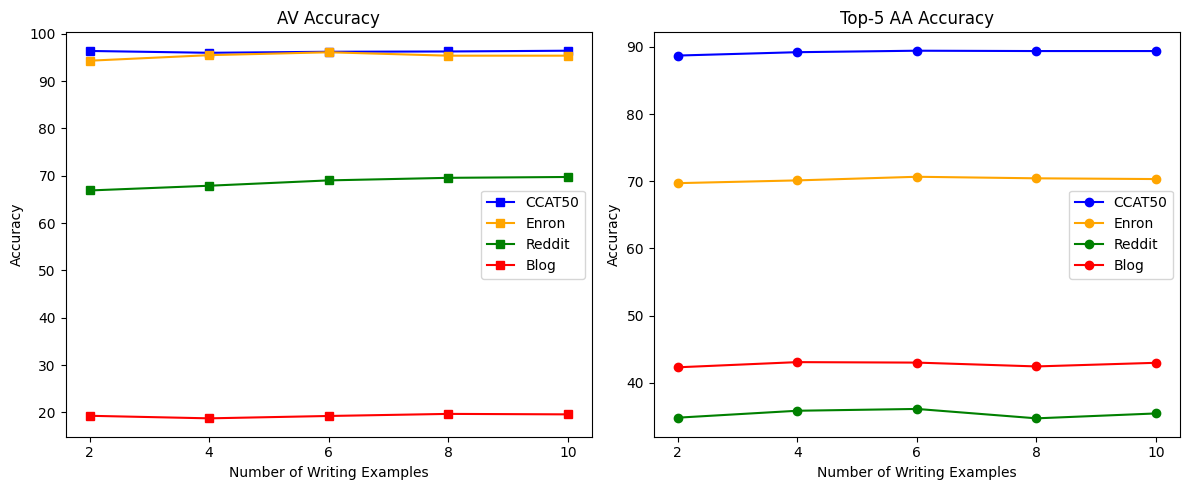

In [103]:
import matplotlib.pyplot as plt

colors = ["blue", "orange", "green", "red", "purple"]
datasets = ['CCAT50', 'Enron', 'Reddit', 'Blog']

dataset_color_map = {d:c for d, c in zip(datasets, colors)}
makers = ["o", "s", "D", "^", "v"]
metric_maker = {"AA": "o", "AV": "s"}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, dataset in enumerate(datasets):
    sub = df_out[df_out["Dataset"] == dataset]
    axes[0].plot(
        sub["Length"],
        sub["AV (top-1)"],
        "-o",
        marker=metric_maker["AV"],
        color=dataset_color_map[dataset],
        label=dataset,
    )
    axes[0].legend()
    axes[0].set_xlabel("Number of Writing Examples")
    axes[0].set_ylabel("Accuracy")
    axes[0].set_title("AV Accuracy")

    axes[1].plot(
        sub["Length"],
        sub["AA (top-5)"],
        "-o",
        marker=metric_maker["AA"],
        color=dataset_color_map[dataset],
        label=dataset,
    )
    axes[1].legend()
    axes[1].set_xlabel("Number of Writing Examples")
    axes[1].set_ylabel("Accuracy")
    axes[1].set_title("Top-5 AA Accuracy")



plt.tight_layout()
plt.savefig("length_vs_accuracy.png", dpi=300)
plt.show()

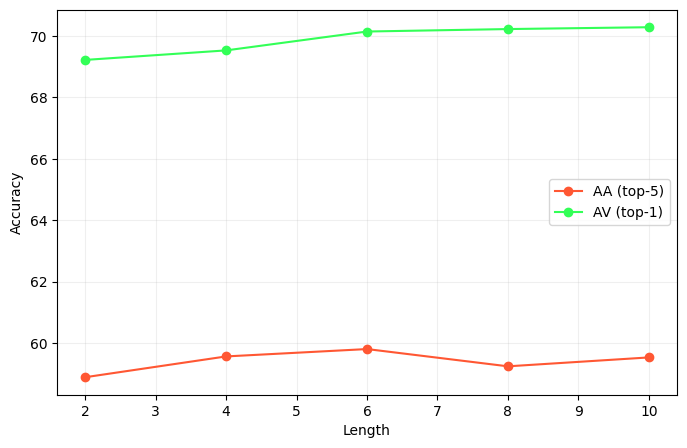

In [98]:
X = [2, 4, 6, 8, 10]
AA_Y = []
AV_Y = []

for x in X:
    sub = df_out[df_out["Length"] == str(x)]
    AA_Y.append(sub["AA (top-5)"].mean())
    AV_Y.append(sub["AV (top-1)"].mean())


plt.figure(figsize=(8, 5))
plt.plot(X, AA_Y, "-o", label="AA (top-5)", color="#FF5733")
plt.plot(X, AV_Y, "-o", label="AV (top-1)", color="#33FF57")
plt.xlabel("Length")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.2)
plt.show()